# Assignment 4

Multiclass classification of flowers.

In [ ]:
# import libraries

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
# prepare train and test data

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_data = train.flow_from_directory('Multiclass/Train/',
                   target_size = (180,180),
                   batch_size = 64,
                   class_mode = 'categorical')

test_data = test.flow_from_directory('Multiclass/Test/',
                  target_size = (180,180),
                   batch_size = 64,
                   class_mode = 'categorical')

# class_mode = 'categorical', will encode labels as one-hot
# class_mode = 'sparse', will encode labels as integer

Found 3438 images belonging to 5 classes.
Found 879 images belonging to 5 classes.


In [ ]:
test_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
# build model

model = Sequential([
    Conv2D(32,(11,11),activation='relu', input_shape=(180,180,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(7,7), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(5,5), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dense(5,activation=tf.nn.softmax)
    ])



C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 170, 170, 32)   │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 79, 79, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 35, 35, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,765 (26.85 MB)

 Trainable params: 7,037,765 (26.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# categorical_crossentropy expects one-hot encoded target
# sparse_categorical_crossentropy expects integer target

In [ ]:
# Train the model and record loss and accuracy

history = model.fit(train_data,
          epochs=10,
          batch_size = 250,
          validation_data = test_data)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.3309 - loss: 1.4592 - val_accuracy: 0.4323 - val_loss: 1.2791
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5187 - loss: 1.1570 - val_accuracy: 0.5347 - val_loss: 1.1397
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5900 - loss: 1.0505 - val_accuracy: 0.5768 - val_loss: 1.0895
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.6218 - loss: 0.9704 - val_accuracy: 0.5518 - val_loss: 1.1797
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.6726 - loss: 0.8630 - val_accuracy: 0.5666 - val_loss: 1.0937
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7019 - loss: 0.7729 - val_accuracy: 0.5916 - val_loss: 1.1153
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7689 - loss: 0.6517 - val_accuracy: 0.5700 - val_loss: 1.2612
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7831 - loss: 0.5881 - val_accuracy: 0.5995 - v

In [ ]:
train_loss, train_accuracy = model.evaluate(train_data)

print("Train Loss : ", train_loss*100)
print("Train Accuracy : ", train_accuracy*100)

54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 651ms/step - accuracy: 0.9208 - loss: 0.2503
Train Loss :  25.40934681892395
Train Accuracy :  92.26294159889221


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[0. 0. 0. 0. 1.]]
Predicted class: tulip


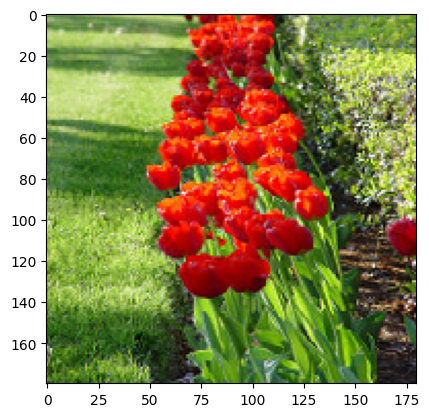

In [ ]:
# predict

dir = ['daisy', 'dandelion','rose', 'sunflower', 'tulip']

image_dir = random.choice(dir)
image_path = 'Multiclass/Test/' + image_dir

# List all image files in the directory
image_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

#  selecting random image in directory
random_img_path = random.choice(image_files)

plt.imshow(image.load_img(random_img_path,target_size=(180,180)))

# Load the random image for prediction
img = image.load_img(random_img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# Predict the image
predictions = model.predict(img_array)
print(predictions)

# Convert prediction to class label

if(predictions[0][0] > 0.5):
    class_label = 'daisy'
elif(predictions[0][1] > 0.5):
    class_label = 'dandelion'
elif(predictions[0][2] > 0.5):
    class_label = 'rose'
elif(predictions[0][3] > 0.5):
    class_label = 'sunflower'
else:
    class_label = 'tulip'

print("Predicted class:", class_label)
